In [4]:
import importlib

from network_models.soundsream_models_and_utils.ss_encoded_dataset import ss_encoded_dataset_full
import torch
from torch.utils.data import DataLoader

dataset_0_2_sec = ss_encoded_dataset_full(csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/datasets/clip_encoded/wrong_tess/umap_3_dims/all_encodings_with_umap_0_2_sec.pkl")
dataset_1_sec = ss_encoded_dataset_full(csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/datasets/clip_encoded/wrong_tess/umap_3_dims/all_encodings_with_umap_1_sec.pkl")
dataset_3_5_sec = ss_encoded_dataset_full(csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/datasets/clip_encoded/wrong_tess/umap_3_dims/all_encodings_with_umap_3_5_sec.pkl")
dataset_5_sec = ss_encoded_dataset_full(csvPath="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/datasets/clip_encoded/wrong_tess/umap_3_dims/all_encodings_with_umap_5_sec.pkl")

2023-04-15 11:33:31.662818: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-15 11:33:32.348772: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-15 11:33:32.348834: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-15 11:33:32.348839: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from numpy import ndarray
json_path ="/home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec_3_dims/"



def genAvgAndAvgPerEmotion(data: pd.DataFrame, labelList: list):
    d = pd.DataFrame()
    d["emotion"] = []
    d["mean"] = []
    d["var"] = []
    for emotion in labelList:
        dIter = pd.DataFrame()
        dfEmo = data.loc[data["clear_emotion"].isin([emotion])]
        npEmo = np.array([point.numpy() for point in dfEmo["pca"].values.tolist()])
        dIter["emotion"] = [emotion]
        dIter["mean"]= [np.round(npEmo.mean(axis=0), 3)]
        dIter["var"] = [np.round(npEmo.var(axis=0), 3)]
        d = pd.concat([d, dIter], ignore_index=True)
        #d.append(dIter)
    return d


def generateJson(data):
    str = "{"
    for i in range(len(data)):
        str += f"\"x{i+1}\": {data[i]}"
        str += "," if i < len(data)-1 else ""
    str += "}"
    return(str)

def writeJson(emotion, string, apendix=""):
    Path(json_path).mkdir(parents=True, exist_ok=True)
    print(f"writing: {string} \n to {json_path+emotion}.json")
    file = open(json_path+f"{emotion}{apendix}.json", "w")
    file.write(string)
    file.close()

def write_latex(fileName, string):
    print(f"writing: {string} \n to {json_path+fileName}.txt")
    file = open(json_path+f"{fileName}.txt", "w")
    file.write(string)
    file.close()

In [2]:
df = dataset_3_5_sec.encoded_dataset.encodedData
dfTess = df.loc[df["dataset"].isin(["tess"])]
labels = dfTess["clear_emotion"].unique().tolist()
# dfEmo = dfTess.loc[dfTess["clear_emotion"].isin(["happy"])]
# np.array([point.numpy() for point in dfEmo["pca"].values.tolist()]).mean(axis=0)
df = genAvgAndAvgPerEmotion(dfTess, dfTess["clear_emotion"].unique().tolist())


#df.loc[df["emotion"].isin(["happy"])]["mean"].tolist()[0]

NameError: name 'dataset_3_5_sec' is not defined

In [ ]:
dfFull = genAvgAndAvgPerEmotion(dataset_3_5_sec.encoded_dataset.encodedData, dataset_3_5_sec.encoded_dataset.encodedData["clear_emotion"].unique().tolist())

In [98]:
dfFull

,emotion,mean,var
0,happy,"[0.349, 0.637, 0.338]","[0.016, 0.044, 0.025]"
1,neutral,"[-0.411, -0.163, -0.487]","[0.188, 0.051, 0.143]"
2,sad,"[0.372, -0.391, -0.01]","[0.009, 0.151, 0.004]"
3,angry,"[0.036, 0.609, -0.396]","[0.008, 0.028, 0.067]"
4,disgust,"[0.674, 0.287, -0.279]","[0.047, 0.004, 0.021]"
5,fear,"[0.161, 0.03, 0.569]","[0.003, 0.018, 0.077]"
6,surprise,"[-0.363, 0.474, 0.347]","[0.031, 0.004, 0.005]"


In [22]:
for row in dfFull.iterrows():
    print(row[1][2])

[0.20486468 0.16146109 0.2353834 ]
[0.2089116  0.15792863 0.16269015]
[0.2138159  0.13120322 0.14631493]
[0.11337569 0.09758501 0.21205078]
[0.10216983 0.09734257 0.14280427]
[0.19513448 0.10354697 0.11666733]
[0.22690502 0.17950717 0.21239217]


In [99]:
dfFull02 = genAvgAndAvgPerEmotion(dataset_0_2_sec.encoded_dataset.encodedData, dataset_0_2_sec.encoded_dataset.encodedData["clear_emotion"].unique().tolist())
dfFull1 = genAvgAndAvgPerEmotion(dataset_1_sec.encoded_dataset.encodedData, dataset_1_sec.encoded_dataset.encodedData["clear_emotion"].unique().tolist())
dfFull3 = genAvgAndAvgPerEmotion(dataset_3_5_sec.encoded_dataset.encodedData, dataset_3_5_sec.encoded_dataset.encodedData["clear_emotion"].unique().tolist())
dfFull5 = genAvgAndAvgPerEmotion(dataset_5_sec.encoded_dataset.encodedData, dataset_5_sec.encoded_dataset.encodedData["clear_emotion"].unique().tolist())

In [100]:
#write_latex("02_tex.txt", dfFull02.to_latex(float_format="%.2f", index=False)) #formatters=[lambda x: "" if x == "[" or "]" else x, lambda x: "" if x == "[" or "]" else x, lambda x: "" if x == "[" or "]" else x]))
#write_latex("1_tex.txt", dfFull1.to_latex(float_format="%.2f", index=False)) #formatters=[lambda x: "" if x == "[" or "]" else x, lambda x: "" if x == "[" or "]" else x, lambda x: "" if x == "[" or "]" else x]))
#write_latex("3_5_tex.txt", dfFull3.to_latex(float_format="%.2f", index=False)) #formatters=[lambda x: "" if x == "[" or "]" else x, lambda x: "" if x == "[" or "]" else x, lambda x: "" if x == "[" or "]" else x]))
#write_latex("5_tex.txt", dfFull5.to_latex(float_format="%.2f", index=False)) #formatters=[lambda x: "" if x == "[" or "]" else x, lambda x: "" if x == "[" or "]" else x, lambda x: "" if x == "[" or "]" else x]))

print(dfFull02.to_latex(float_format="%.2f", index=False))
print(dfFull1.to_latex(float_format="%.2f", index=False))
print(dfFull3.to_latex(float_format="%.2f", index=False))
print(dfFull5.to_latex(float_format="%.2f", index=False))

\begin{tabular}{lll}
\toprule
 emotion &                     mean &                   var \\
\midrule
   happy &      [0.007, 0.017, 0.1] &  [0.16, 0.129, 0.121] \\
 neutral &  [-0.078, 0.058, -0.098] &  [0.098, 0.148, 0.17] \\
     sad &  [0.089, -0.029, -0.063] & [0.164, 0.125, 0.153] \\
   angry &    [-0.042, 0.04, 0.055] & [0.148, 0.132, 0.143] \\
 disgust &   [-0.022, 0.069, 0.017] & [0.179, 0.118, 0.157] \\
    fear &    [-0.05, -0.04, 0.011] & [0.132, 0.116, 0.148] \\
surprise & [-0.057, -0.096, -0.103] & [0.161, 0.083, 0.155] \\
\bottomrule
\end{tabular}

\begin{tabular}{lll}
\toprule
 emotion &                    mean &                   var \\
\midrule
   happy &  [0.085, 0.373, -0.089] &  [0.017, 0.14, 0.048] \\
 neutral &  [0.334, -0.652, 0.151] & [0.021, 0.075, 0.014] \\
     sad &  [0.227, -0.363, -0.39] &  [0.013, 0.033, 0.12] \\
   angry &  [-0.387, 0.273, 0.397] & [0.135, 0.068, 0.035] \\
 disgust & [-0.269, -0.317, 0.216] & [0.061, 0.024, 0.014] \\
    fear &  [0.533,

In [24]:
for label in labels:
    line = df.loc[df["emotion"].isin([label])]["mean"].tolist()[0]
    writeJson(label, generateJson(line), apendix="_tess")

writing: {"x1": 0.8594265580177307,"x2": 0.3078649044036865,"x3": -0.3972800076007843} 
 to /home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec_3_dims/disgust.json
writing: {"x1": -0.03818598389625549,"x2": 0.7539190053939819,"x3": -0.6361017227172852} 
 to /home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec_3_dims/angry.json
writing: {"x1": 0.4506640136241913,"x2": 0.8147784471511841,"x3": 0.4637155532836914} 
 to /home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec_3_dims/happy.json
writing: {"x1": 0.15468187630176544,"x2": -0.08899111300706863,"x3": 0.8420271873474121} 
 to /home/ckwdani/Programming/Projects/masterarbeit/Jupyter/mainProject/notebooks_clip/content/results/3_5_sec_3_dims/fear.json
writing: {"x1": -0.48591193556785583,"x2": 0.5102663636207581,"x3": 0.3900071382522583} 
 to /home/ckwdani/Programming/Projects/

In [30]:
df = dataset_3_5_sec.encoded_dataset.encodedData


In [5]:
dfOrig = dataset_5_sec.encoded_dataset.encodedData
df = dataset_5_sec.encoded_dataset.encodedData
dfTess = df.loc[df["dataset"].isin(["tess"])]
df3D = genAvgAndAvgPerEmotion(dfOrig, dfOrig["clear_emotion"].unique().tolist())


In [6]:
df3D

,emotion,mean,var
0,happy,"[0.621, 0.63, -0.374]","[0.002, 0.051, 0.03]"
1,neutral,"[-0.231, 0.099, -0.342]","[0.612, 0.006, 0.126]"
2,sad,"[0.724, -0.437, 0.038]","[0.001, 0.127, 0.007]"
3,angry,"[0.561, 0.666, 0.301]","[0.003, 0.04, 0.035]"
4,disgust,"[0.755, 0.189, 0.566]","[0.002, 0.006, 0.082]"
5,fear,"[0.643, -0.025, -0.574]","[0.001, 0.025, 0.08]"
6,surprise,"[0.896, 0.383, -0.38]","[0.005, 0.005, 0.009]"


In [49]:
d = {
"Anger": np.asarray([-0.43, 0.67,  0.34]),
"Joy": np.asarray([0.76, 0.48,  0.35]),
"Surprise": np.asarray([0.4, 0.67,  -0.13]),
"Disgust": np.asarray([-0.6, 0.35,  0.11]),
"Fear": np.asarray([-0.64, 0.6 , -0.43]),
"Sadness": np.asarray([-0.63, 0.27,  -0.33]),
}



import pandas as pd


newdfVAD = pd.DataFrame.from_dict(d, orient='index', columns=['mean1', 'mean2', 'mean3'])
newdfVAD = newdfVAD.reset_index().rename(columns={'index': 'emotion'})
newdfVAD['mean'] = newdfVAD[['mean1', 'mean2', 'mean3']].apply(lambda x: np.asarray(x), axis=1)
newdfVAD = newdfVAD[['emotion', 'mean']]


In [47]:
np.asarray(df3D['mean'].tolist())
arrayx = np.asarray(newdfVAD['mean'].tolist())[:,0]
arrayx

array([-0.43,  0.76,  0.4 , -0.6 , -0.64, -0.63])

Text(0.5, 0.92, 'Valence Arousal Dominance Mean Values')

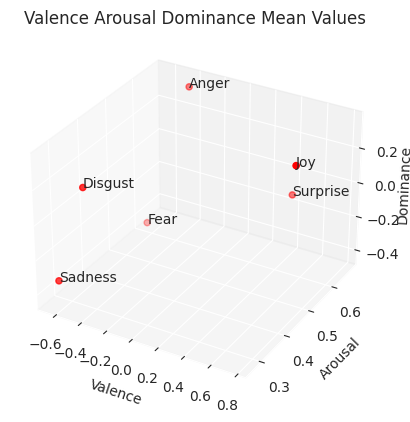

In [107]:
labels =newdfVAD["emotion"].tolist()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()#figsize=(8, 8)) #.gca(projection='3d')
ax3d = plt.axes(projection='3d',  facecolor='none')

arrayx = np.asarray(newdfVAD['mean'].tolist())[:,0]
arrayy = np.asarray(newdfVAD['mean'].tolist())[:,1]
arrayz = np.asarray(newdfVAD['mean'].tolist())[:,2]

# ax3d.set_xlim3d([-1, 1])
# ax3d.set_ylim3d([-1, 1])
# ax3d.set_zlim3d([-1, 1])

ax3d.scatter(arrayx, arrayy, arrayz, c="red")
for x, y, z, label in zip(arrayx, arrayy, arrayz, labels):
    ax3d.text(x, y, z, label)
    #xe, ye, ze = drawElipsis(x,y,z, varss[0], varss[1], varss[2])
    #ax3d.plot_wireframe(xe, ye, ze)
ax3d.set_xlabel('Valence')
ax3d.set_ylabel('Arousal')
ax3d.set_zlabel('Dominance', labelpad=-1)
#fig.subplots_adjust(right=10)
plt.title("Valence Arousal Dominance Mean Values")


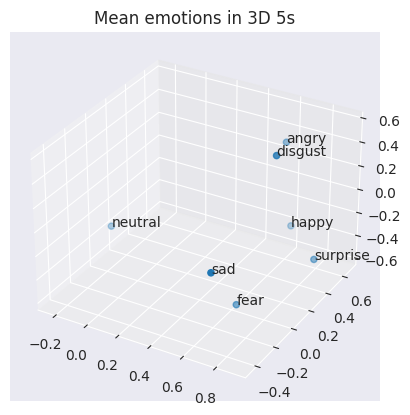

In [105]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure() #.gca(projection='3d')
ax3d = plt.axes(projection='3d')

#xyzxyz
#yxxzzy
#zzyyxx

def drawElipsis(xCenter, yCenter, zCenter, xr, yr, zr):
    #draw sphere
    u = np.linspace(0, 2 * np.pi, 10)
    v = np.linspace(0, np.pi, 10)
    x = xCenter + xr * np.outer(np.cos(u), np.sin(v))
    y = yCenter + yr * np.outer(np.sin(u), np.sin(v))
    z = zCenter + zr * np.outer(np.ones_like(u), np.cos(v))
    return (x,y,z)


arrayx = np.asarray(df3D['mean'].tolist())[:,0]
arrayy = np.asarray(df3D['mean'].tolist())[:,1]
arrayz = np.asarray(df3D['mean'].tolist())[:,2]
variances = df3D["var"].tolist()



d = {
"Anger": [-0.43, 0.67,  0.34],
"Joy": [0.76, 0.48,  0.35],
"Surprise": [0.4, 0.67,  -0.13],
"Disgust": [-0.6, 0.35,  0.11],
"Fear": [-0.64, 0.6 , -0.43],
"Sadness": [-0.63, 0.27,  -0.33],
}








# z,x,y --- 3.s

labels =df3D["emotion"].tolist()

np.asarray(df3D['mean'].tolist())[:,0]
ax3d.scatter(arrayx, arrayy, arrayz)
for x, y, z, label, varss in zip(arrayx, arrayy, arrayz, labels, variances):
    ax3d.text(x, y, z, label)
    #xe, ye, ze = drawElipsis(x,y,z, varss[0], varss[1], varss[2])
    #ax3d.plot_wireframe(xe, ye, ze)
plt.title("Mean emotions in 3D 5s")
plt.show()

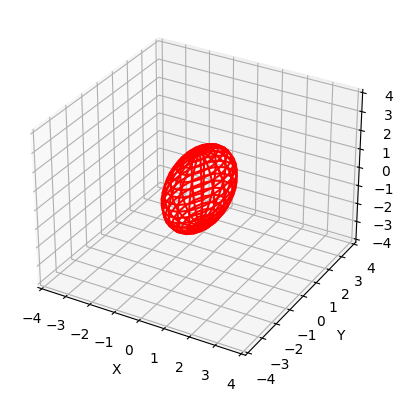

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the radii of the ellipsoid
a = 1  # radius along the x-axis
b = 2  # radius along the y-axis
c = 2  # radius along the z-axis

# Define the center point of the ellipsoid
x0, y0, z0 = 0, 0, 0

# Create a grid of coordinates
u = np.linspace(0, 2 * np.pi, 20)
v = np.linspace(0, np.pi, 20)
x = x0 + a * np.outer(np.cos(u), np.sin(v))
y = y0 + b * np.outer(np.sin(u), np.sin(v))
z = z0 + c * np.outer(np.ones_like(u), np.cos(v))

# Create a 3D scatterplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the ellipsoid as a wireframe
ax.plot_wireframe(x, y, z, color='red')

# Set the plot limits and labels

ax.set_xlim([-4, 4])
ax.set_ylim([-4, 4])
ax.set_zlim([-4, 4])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()

In [125]:
df3D["var"].tolist()[0][0]

0.0017514498

In [4]:
#asaa = pd.DataFrame(genAvgFull([arra, arra_dr], data_set.encoded_dataset.label_list ,["conv", "dimred"]))


# write_latex("conv_mean_var" ,asaa["conv"].T.to_latex(float_format="{{:0.2f}}"))
# write_latex("dimred_mean_var" ,asaa["dimred"].T.to_latex(float_format="{{:0.2f}}"))
# #asaa["conv"].to_latex()

In [53]:
import sys
import importlib
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
module_path = str(Path.cwd().parents[0] / "utils")
if module_path not in sys.path:
    sys.path.append(module_path)
import utils.utils__evalutation as ua
importlib.reload(ua)

def show_bars_local(predictions, label_list, color="r", title_string ="", dims = 4, normalize = False):

    ua.show_bars(predictions, label_list, color, title_string, dims, normalize = normalize)



In [7]:
dataset_1_sec.getNextNeighbour(vector=[0.5, 0.5, 0.5, 0.5], emotion="sad",included_datasets= ["tess", "mesd"])

encoded          [tensor(1.0876), tensor(-0.4362), tensor(1.174...
emotionCode                                                    [5]
clear_emotion                                                  sad
pca              [tensor(0.4267), tensor(0.1840), tensor(0.5645...
dataset                                                       mesd
Name: 288, dtype: object

In [106]:
dfOrig = dataset_1_sec.encoded_dataset.encodedData

labels = dataset_1_sec.encoded_dataset.label_list
dict = {}
for label in labels:
    emo = dfOrig.loc[dfOrig['clear_emotion'].isin([label])]
    dict.update({label: [dp.numpy() for dp in emo["pca"].tolist()]})

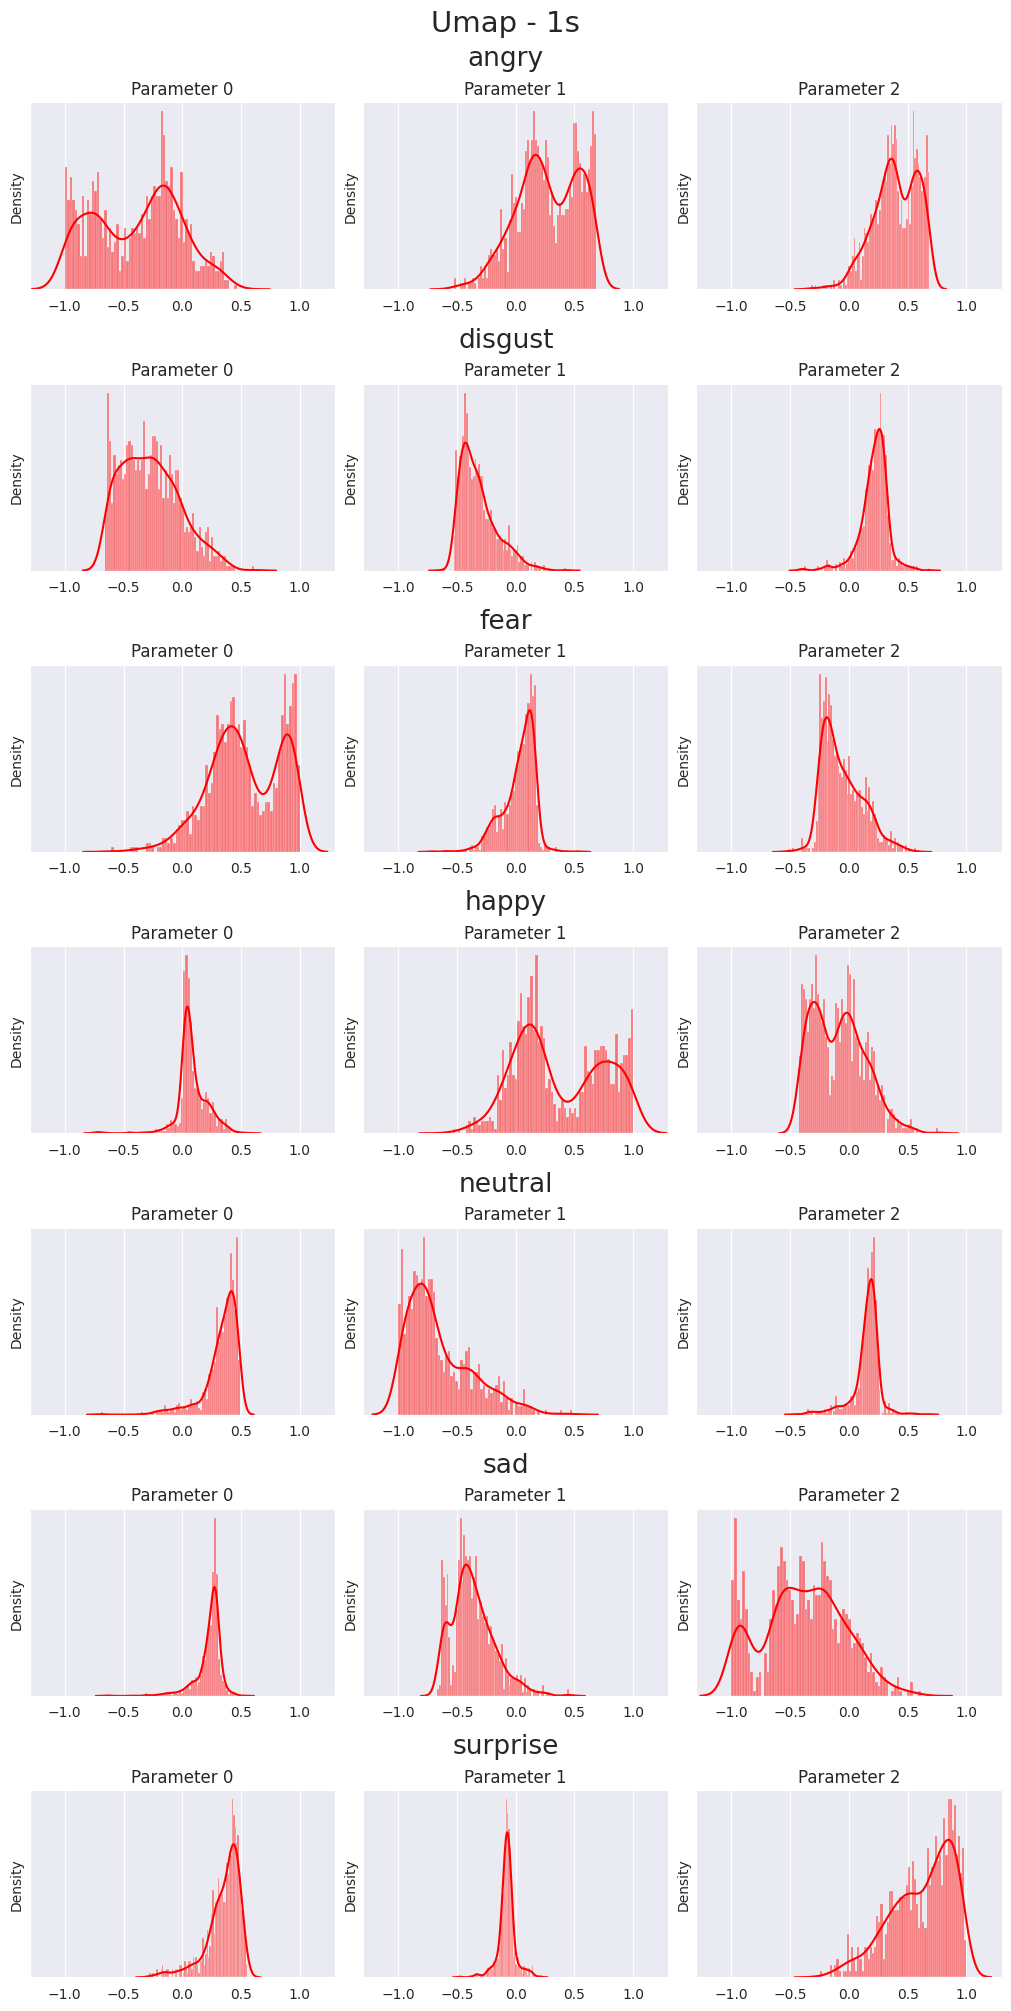

In [107]:

show_bars_local(dict, labels, color="r", title_string="Umap - 1s", dims=3, normalize = True)

In [81]:
len(dict["neutral"])

759